In [87]:
import sys 
BASE_DIR="/home/asirvent/second_CTA_analysis"
sys.path.append(f"{BASE_DIR}/src/CTA-data-analisis-library/")
import numpy as np 
import matplotlib.pyplot as plt
import os 
import re 
import glob 
import tensorflow as tf 
import seaborn as sns
import pandas as pd
import gc
import pickle 

#propias
import unzipdata_and_first_treatments as manipulate
import loaddata4use
import model_creation_functions as models

# %%
PATH_TXT=f"/home/asirvent/SimTelArray_2022_05"

RESULTS_DIR=f"/home/asirvent/second_CTA_analysis/notebooks/results_UGR"


In [2]:
# %%
# voy a cargar toda la info de los txt para cada elemento 
elementos=['gamma', 'electron', 'proton', 'helium', 'iron', 'nitrogen', 'silicon']
aux2=[]
for i , elemento in enumerate(elementos):
    #dict_master[elemento]={}
    list_aux=glob.glob(f"{PATH_TXT}/extract_{elemento}/*.txt")
    list_aux=sorted(list_aux)

    for dir_aux in list_aux:
        run_aux=int(re.findall("(\d{3})\.txt",dir_aux)[0])
        tel_aux=int(re.findall("tel_(\d{1})_run",dir_aux)[0])
        #La idea es tener un diccionario enorme de todo lo que podemos necesitar para seleccionar el rango de todo y las distribuciones.  
        # Esto lo logramos con los datos de extract  
        array_aux=loaddata4use.extract_info_txt(dir_aux)
        if array_aux.size>0:
            aux2.append({"elemento":elemento,"run":run_aux,"tel":tel_aux,"energia":array_aux[:,2],"eventos":array_aux[:,0].astype(int)})
        else:
            aux2.append({"elemento":elemento,"run":run_aux,"tel":tel_aux,"energia":np.nan,"eventos":np.nan})
df_final=pd.DataFrame.from_dict(aux2)
df_final

,elemento,run,tel,energia,eventos
0,gamma,1,1,"[0.1087, 0.0616, 0.0904, 4.5563, 0.3297, 0.057...","[800, 1200, 1700, 2300, 3600, 4200, 4300, 5200..."
1,gamma,2,1,"[0.0957, 0.0321, 0.2691, 0.0559, 0.2708, 1.74,...","[100, 400, 700, 2100, 2500, 3100, 3300, 3500, ..."
2,gamma,3,1,NaN,NaN
3,gamma,4,1,"[0.0424, 0.1245, 0.0328, 0.0341, 1.0774, 0.070...","[100, 200, 700, 1800, 2200, 2600, 3500, 3900, ..."
4,gamma,5,1,"[0.2236, 0.2041, 0.0704, 0.1473, 0.0458, 0.095...","[200, 600, 800, 1000, 1700, 1900, 3500, 3600, ..."
...,...,...,...,...,...
9628,silicon,356,4,"[4.4503, 4.3298, 3.8065, 4.5505, 4.7329, 3.959...","[4100, 6900, 7800, 10100, 10200, 11600, 13800,..."
9629,silicon,357,4,"[3.2706, 4.7084, 4.9035, 3.0785, 3.5371, 4.756...","[400, 1200, 2100, 7400, 9300, 10700, 11700, 13..."
9630,silicon,358,4,"[4.8596, 4.8966, 2.2676, 4.0688, 4.3492, 2.959...","[700, 2700, 8300, 9000, 15400, 16300, 20500, 2..."
9631,silicon,359,4,"[2.1081, 2.8272, 3.8519, 2.8368, 4.525, 3.0555...","[1700, 3900, 5300, 6700, 11300, 12400, 14300, ..."


In [29]:
a=df_final.groupby(["elemento","run"]).apply(lambda x: x if len(list(x["tel"]))==4 else None)
a

elemento  run  tel  \
elemento run                            
electron 1   397   electron    1    1   
             764   electron    1    2   
             1126  electron    1    3   
             1492  electron    1    4   
         2   398   electron    2    1   
...                     ...  ...  ...   
silicon  359 9631   silicon  359    4   
         360 8552   silicon  360    1   
             8912   silicon  360    2   
             9272   silicon  360    3   
             9632   silicon  360    4   

                                                             energia  \
elemento run                                                           
electron 1   397   [0.7343, 0.2967, 0.1307, 0.2604, 0.1603, 0.052...   
             764   [0.1307, 0.1603, 0.0522, 0.0365, 0.0358, 0.803...   
             1126  [0.2227, 0.1307, 0.1603, 0.1108, 0.0358, 0.803...   
             1492  [0.2227, 0.7343, 0.2967, 0.1307, 0.2604, 0.161...   
         2   398   [0.0566, 0.0508, 0.0656, 1.5473, 0.7692, 0.529...   
...                                                              ...   
silicon  359 9631  [2.1081, 2.8272, 3.8519, 2.8368, 4.525, 3.0555...   
         360 8552  [4.6059, 3.8817, 4.4777, 2.9524, 2.7399, 4.324...   
             8912  [4.6059, 3.8379, 3.8817, 4.4777, 2.9524, 2.739...   
             9272  [4.6059, 3.8379, 3.8817, 4.4777, 2.9524, 4.626...   
             9632  [4.6059, 3.8817, 4.4777, 3.303, 3.5036, 3.8182...   

                                                             eventos  
elemento run                                                          
electron 1   397   [21200, 35900, 55300, 61000, 74000, 74800, 752...  
             764   [55300, 74000, 74800, 77500, 77700, 82500, 894...  
             1126  [800, 55300, 74000, 75200, 77700, 82500, 10600...  
             1492  [800, 21200, 35900, 55300, 61000, 62300, 74000...  
         2   398   [13900, 35800, 47100, 50700, 54300, 63600, 638...  
...                                                              ...  
silicon  359 9631  [1700, 3900, 5300, 6700, 11300, 12400, 14300, ...  
         360 8552  [1700, 4500, 4900, 5900, 6500, 7100, 7200, 760...  
             8912  [1700, 3800, 4500, 4900, 5900, 6500, 7100, 720...  
             9272  [1700, 3800, 4500, 4900, 5900, 7600, 9100, 132...  
             9632  [1700, 4500, 4900, 13200, 14800, 16100, 22200,...  

[9568 rows x 5 columns]

In [34]:
df_final

,elemento,run,tel,energia,eventos
0,gamma,1,1,"[0.1087, 0.0616, 0.0904, 4.5563, 0.3297, 0.057...","[800, 1200, 1700, 2300, 3600, 4200, 4300, 5200..."
1,gamma,2,1,"[0.0957, 0.0321, 0.2691, 0.0559, 0.2708, 1.74,...","[100, 400, 700, 2100, 2500, 3100, 3300, 3500, ..."
2,gamma,3,1,NaN,NaN
3,gamma,4,1,"[0.0424, 0.1245, 0.0328, 0.0341, 1.0774, 0.070...","[100, 200, 700, 1800, 2200, 2600, 3500, 3900, ..."
4,gamma,5,1,"[0.2236, 0.2041, 0.0704, 0.1473, 0.0458, 0.095...","[200, 600, 800, 1000, 1700, 1900, 3500, 3600, ..."
...,...,...,...,...,...
9628,silicon,356,4,"[4.4503, 4.3298, 3.8065, 4.5505, 4.7329, 3.959...","[4100, 6900, 7800, 10100, 10200, 11600, 13800,..."
9629,silicon,357,4,"[3.2706, 4.7084, 4.9035, 3.0785, 3.5371, 4.756...","[400, 1200, 2100, 7400, 9300, 10700, 11700, 13..."
9630,silicon,358,4,"[4.8596, 4.8966, 2.2676, 4.0688, 4.3492, 2.959...","[700, 2700, 8300, 9000, 15400, 16300, 20500, 2..."
9631,silicon,359,4,"[2.1081, 2.8272, 3.8519, 2.8368, 4.525, 3.0555...","[1700, 3900, 5300, 6700, 11300, 12400, 14300, ..."


In [35]:
# %%


# %%
def f_get_comon_events(df):
    all_eventos=np.concatenate(df["eventos"].to_numpy())
    event,count=np.unique(all_eventos,return_counts=True)
    all_energias=np.concatenate(df["energia"].to_numpy())
    energias_eventos_comunes=[]
    for i in event[count==4]:
        indx=np.argwhere(i==all_eventos)
        if np.unique(all_energias[indx]).size!=1:
            print("Algo ha pasado con el evento i, no coinciden las energias")
        energias_eventos_comunes.append(all_energias[indx[0]][0])
    return pd.DataFrame({"eventos":event[count==4],"energia":energias_eventos_comunes})

# %%
df_common_events=df_final.dropna().groupby(["elemento","run"]).apply(f_get_comon_events).droplevel(2).reset_index()#.to_frame()
df_common_events


,elemento,run,eventos,energia
0,electron,1,55300,0.1307
1,electron,1,74000,0.1603
2,electron,1,82500,0.8038
3,electron,1,109700,0.6685
4,electron,1,152100,0.2394
...,...,...,...,...
603177,silicon,360,1796100,4.8594
603178,silicon,360,1798300,2.8470
603179,silicon,360,1798500,4.9862
603180,silicon,360,1798800,4.4138


In [36]:

# %%
eventos_number=df_common_events.groupby(["elemento","run"]).size().to_frame().reset_index()
eventos_number=eventos_number.rename(columns={0:"n"})

# %%
#vamos a seleccionar unas runs para el train y otras para el test   
eventos_number_rand=eventos_number.groupby("elemento").apply(lambda x : x.sample(frac=1)).reset_index(drop=True)

# %%
eventos_number_rand["percent"]=eventos_number_rand.groupby("elemento")["n"].transform(lambda x : x/x.sum())

# %%
eventos_number_rand["cumsum"]=eventos_number_rand.groupby("elemento")["percent"].transform(lambda x : x.cumsum())


In [37]:
eventos_number_rand

,elemento,run,n,percent,cumsum
0,electron,5,248,0.002863,0.002863
1,electron,16,232,0.002678,0.005542
2,electron,123,252,0.002909,0.008451
3,electron,309,246,0.002840,0.011291
4,electron,37,218,0.002517,0.013808
...,...,...,...,...,...
2380,silicon,188,214,0.002482,0.988701
2381,silicon,201,265,0.003074,0.991776
2382,silicon,84,248,0.002877,0.994652
2383,silicon,139,263,0.003051,0.997703


In [6]:
runs=pd.read_csv(f"{RESULTS_DIR}/runs_train_test.csv",index_col=[0])
runs

,elemento,mode,list_runs
0,electron,Test,"[367, 297, 339, 313, 41, 326, 181, 345, 260, 1..."
1,electron,Train,"[354, 344, 357, 311, 79, 104, 315, 94, 364, 14..."
2,gamma,Test,"[52, 77, 8, 19, 99, 92, 45, 81, 70, 15, 58, 87..."
3,gamma,Train,"[51, 57, 97, 86, 62, 67, 69, 24, 65, 78, 26, 6..."
4,helium,Test,"[158, 90, 123, 244, 164, 112, 34, 98, 61, 72, ..."
5,helium,Train,"[184, 151, 77, 49, 133, 28, 125, 12, 6, 52, 29..."
6,iron,Test,"[332, 250, 374, 381, 208, 39, 205, 109, 105, 3..."
7,iron,Train,"[152, 111, 395, 120, 184, 341, 16, 158, 95, 22..."
8,nitrogen,Test,"[321, 226, 245, 206, 48, 183, 214, 314, 132, 1..."
9,nitrogen,Train,"[357, 284, 155, 149, 161, 233, 180, 188, 77, 2..."


In [62]:
import ast


In [63]:
train_electron_runs=ast.literal_eval(runs.loc[(runs["elemento"]=="electron")&(runs["mode"]=="Train"),"list_runs"].item())

In [70]:
eventos_train=[ True if ((i["elemento"]=="electron")&(i["run"] in train_electron_runs)) else False for _,i in df_final.iterrows()]

In [74]:
df_final.loc[eventos_train]

,elemento,run,tel,energia,eventos
400,electron,4,1,"[0.1957, 1.1597, 0.3005, 0.0336, 0.0428, 0.102...","[2000, 12700, 15600, 35100, 36200, 43400, 4850..."
401,electron,5,1,"[0.2376, 0.104, 3.3916, 3.1382, 0.5938, 0.3936...","[1400, 20500, 23600, 37100, 56000, 62700, 6610..."
402,electron,6,1,"[2.6763, 0.7043, 0.0539, 0.0823, 0.0431, 0.031...","[4300, 13800, 19000, 22700, 57600, 96500, 9710..."
403,electron,7,1,"[0.0484, 0.067, 0.1169, 2.0022, 0.4541, 0.1074...","[2100, 5000, 11400, 14900, 19300, 34900, 39100..."
404,electron,8,1,"[0.0707, 0.6065, 2.3017, 0.1881, 0.1099, 0.080...","[5300, 9000, 15800, 20700, 23000, 38400, 40600..."
...,...,...,...,...,...
1849,electron,363,4,"[2.2894, 3.9629, 2.9175, 1.9668, 2.6584, 4.822...","[700, 1400, 1700, 1900, 2800, 3800, 4000, 4800..."
1850,electron,364,4,"[3.544, 4.0154, 3.6966, 3.1225, 4.066, 3.9171,...","[100, 1800, 3000, 3400, 8000, 12400, 12500, 12..."
1852,electron,366,4,"[3.8508, 2.5637, 2.1473, 3.1065, 4.4443, 1.969...","[3600, 3900, 4200, 6800, 10000, 10400, 10800, ..."
1855,electron,369,4,"[3.813, 3.5752, 2.6346, 1.6029, 4.898, 4.9678,...","[1700, 2400, 3000, 5300, 8000, 11300, 15200, 1..."


In [84]:
df_final.loc[eventos_train].run.unique()

array([  4,   5,   6,   7,   8,   9,  10,  12,  13,  14,  15,  16,  17,
        18,  19,  20,  21,  22,  23,  26,  27,  28,  30,  31,  32,  33,
        36,  39,  40,  42,  43,  45,  46,  48,  49,  51,  52,  53,  54,
        55,  57,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,
        72,  73,  74,  75,  76,  77,  79,  80,  81,  82,  83,  88,  89,
        91,  92,  94,  95,  96, 101, 103, 104, 105, 107, 108, 109, 110,
       111, 113, 114, 115, 116, 119, 121, 122, 123, 124, 126, 127, 128,
       129, 130, 136, 137, 139, 140, 141, 142, 143, 144, 146, 147, 149,
       150, 151, 152, 153, 154, 157, 158, 159, 160, 161, 162, 163, 164,
       166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
       179, 182, 183, 185, 186, 187, 188, 190, 191, 192, 193, 194, 195,
       196, 197, 199, 200, 201, 203, 204, 205, 206, 207, 208, 209, 210,
       211, 213, 214, 215, 216, 220, 221, 222, 224, 225, 226, 227, 228,
       229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 240, 24

In [86]:
np.all(np.array(sorted(ast.literal_eval(runs.iloc[1]["list_runs"])))==df_final.loc[eventos_train].run.unique())

True

In [100]:
with open(f"{RESULTS_DIR}/hist.pickle","rb") as pick:
    hist= pickle.load(pick)

In [96]:
hist.keys()

dict_keys(['loss', 'acc', 'auc', 'mean_squared_error', 'val_loss', 'val_acc', 'val_auc', 'val_mean_squared_error'])

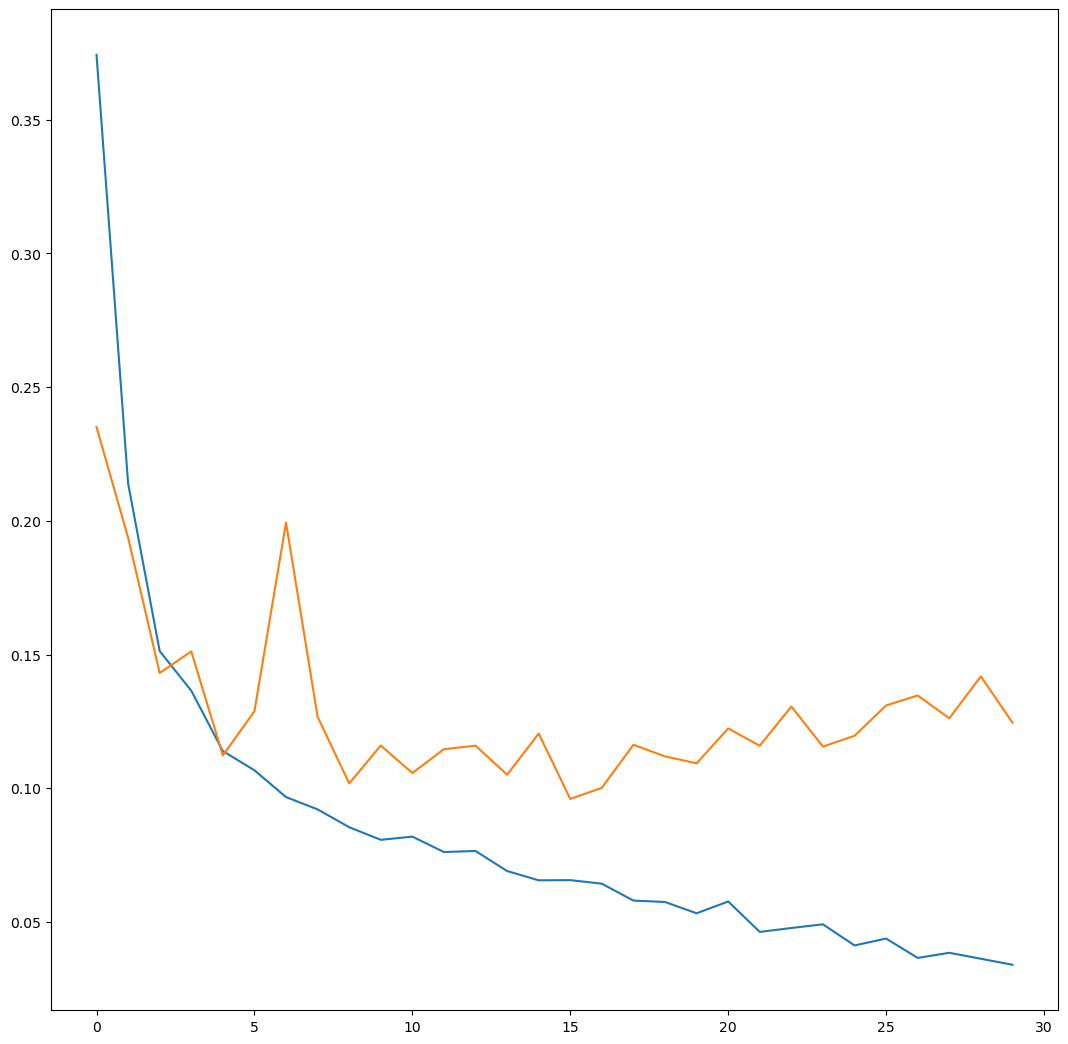

In [101]:
fig = plt.figure(figsize=(13,13))
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])

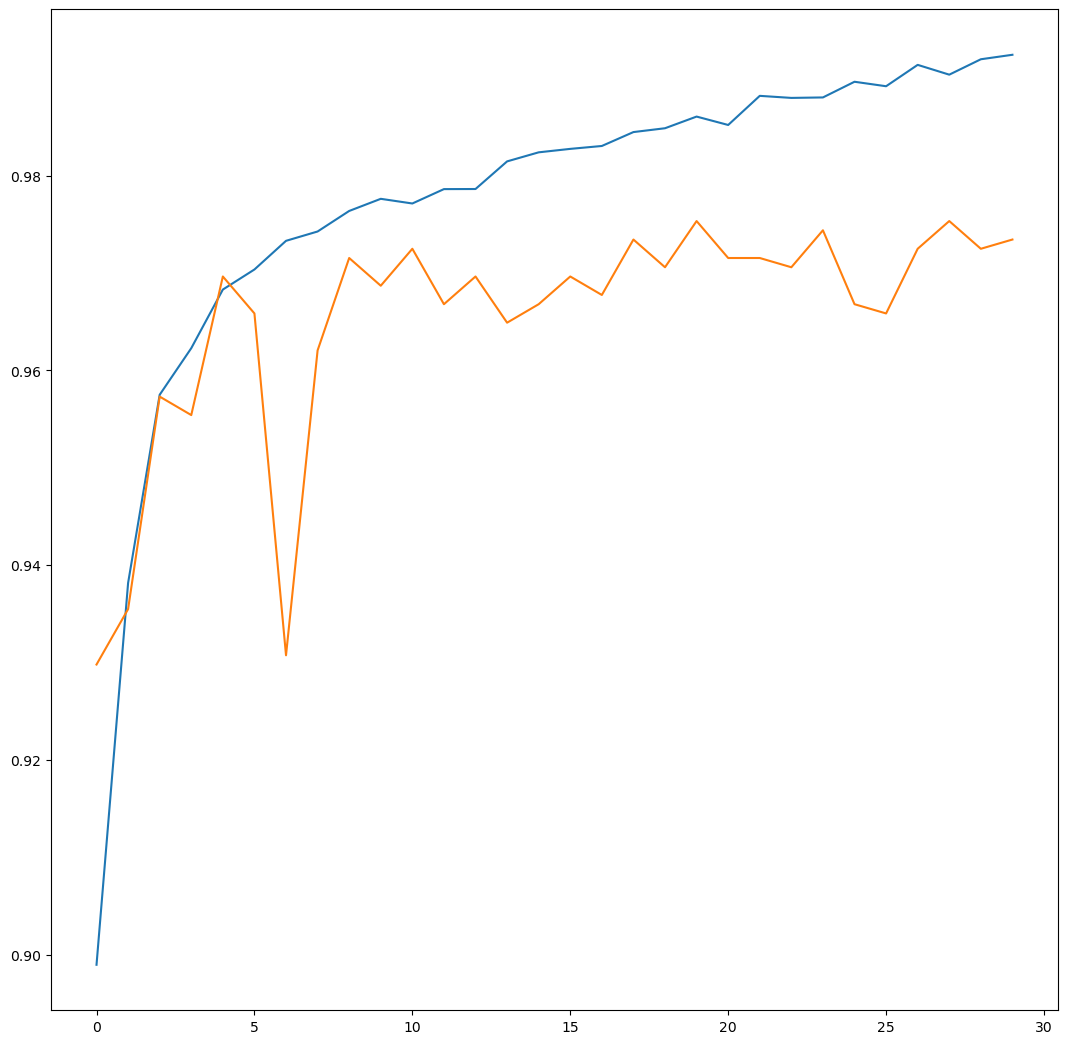

In [102]:
fig = plt.figure(figsize=(13,13))
plt.plot(hist["acc"])
plt.plot(hist["val_acc"])

In [103]:
modelo=tf.keras.models.load_model(f"{RESULTS_DIR}/test.h5")

2023-06-28 21:48:56.281199: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9648 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:1a:00.0, compute capability: 7.5
2023-06-28 21:48:56.282986: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 9648 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:1b:00.0, compute capability: 7.5
2023-06-28 21:48:56.284638: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 9648 MB memory:  -> device: 2, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:1c:00.0, compute capability: 7.5
2023-06-28 21:48:56.285782: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 9648 MB memory:  -> device: 3, name: NVIDIA GeForce RTX

In [105]:
runs

,elemento,mode,list_runs
0,electron,Test,"[367, 297, 339, 313, 41, 326, 181, 345, 260, 1..."
1,electron,Train,"[354, 344, 357, 311, 79, 104, 315, 94, 364, 14..."
2,gamma,Test,"[52, 77, 8, 19, 99, 92, 45, 81, 70, 15, 58, 87..."
3,gamma,Train,"[51, 57, 97, 86, 62, 67, 69, 24, 65, 78, 26, 6..."
4,helium,Test,"[158, 90, 123, 244, 164, 112, 34, 98, 61, 72, ..."
5,helium,Train,"[184, 151, 77, 49, 133, 28, 125, 12, 6, 52, 29..."
6,iron,Test,"[332, 250, 374, 381, 208, 39, 205, 109, 105, 3..."
7,iron,Train,"[152, 111, 395, 120, 184, 341, 16, 158, 95, 22..."
8,nitrogen,Test,"[321, 226, 245, 206, 48, 183, 214, 314, 132, 1..."
9,nitrogen,Train,"[357, 284, 155, 149, 161, 233, 180, 188, 77, 2..."


In [106]:
test_electron_runs=ast.literal_eval(runs.loc[(runs["elemento"]=="electron")&(runs["mode"]=="Test"),"list_runs"].item())

In [ ]:
def cambiar_ejes_lista(lista):
    for i,j in enumerate(lista):
        lista[i]=np.swapaxes(j,1,2)
    return lista

In [134]:
test_electron_runs[:3]

[367, 297, 339]

In [145]:
PATH_NPY=f"{BASE_DIR}/data_full/elementos_npy"
x_train_list,x_test_list,y_train_list,y_test_list=loaddata4use.load_dataset_completo(PATH_NPY,[test_electron_runs[6:8]],[1,2,3,4],labels_asign=None,elements=["electron"],pre_name_folders="npy_",test_size=0.01,same_quant="all",verbose=True,fill=True,categorical=True)

Load of names and common events
_______________
0 ;  Element:  electron  , Runs:  [181, 345]  Shape of common events (tels,common events):  (4, 253)
1 ;  Element:  electron  , Runs:  [181, 345]  Shape of common events (tels,common events):  (4, 235)
_______________
Load of actual npy data:
_______________
Element:  electron , Telescope:  1  Shape of loaded array (amount of images, size of images):  (488, 93, 55)
Element:  electron , Telescope:  2  Shape of loaded array (amount of images, size of images):  (488, 93, 55)
Element:  electron , Telescope:  3  Shape of loaded array (amount of images, size of images):  (488, 93, 55)
Element:  electron , Telescope:  4  Shape of loaded array (amount of images, size of images):  (488, 93, 55)
SUCCESS


In [149]:

x_train_list=cambiar_ejes_lista(x_train_list)

x_test_list=cambiar_ejes_lista(x_test_list)

In [150]:
y_pred=modelo.predict(x_train_list)

2023-06-28 22:39:41.034703: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8800


16/16 [==============================] - 12s 31ms/step


In [156]:
np.unique(np.argmax(y_pred,axis=1),return_counts=True)

(array([0, 1, 2]), array([ 16, 455,  12]))

y ESTO LO HACEMOS PARA TODOS 
